In [10]:
pip install pandas numpy matplotlib seaborn scikit-learn xgboost lightgbm catboost jupyterlab

     ---------------------------------------- 8.1/8.1 MB 12.1 MB/s eta 0:00:00
     -------------------------------------- 294.9/294.9 kB 9.2 MB/s eta 0:00:00
     ---------------------------------------- 8.9/8.9 MB 13.2 MB/s eta 0:00:00
     --------------------------------------- 72.0/72.0 MB 11.5 MB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 13.2 MB/s eta 0:00:00
     -------------------------------------- 102.5/102.5 MB 2.1 MB/s eta 0:00:00
     ---------------------------------------- 12.3/12.3 MB 8.1 MB/s eta 0:00:00
     ------------------------------------- 225.2/225.2 kB 13.4 MB/s eta 0:00:00
     ---------------------------------------- 2.3/2.3 MB 13.2 MB/s eta 0:00:00
     ---------------------------------------- 73.8/73.8 kB 4.0 MB/s eta 0:00:00
     ---------------------------------------- 7.0/7.0 MB 13.2 MB/s eta 0:00:00
     -------------------------------------- 113.9/113.9 kB 6.5 MB/s eta 0:00:00
     --------------------------------------- 

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress t

In [12]:
pip install tensorflow


     -------------------------------------- 331.8/331.8 MB 5.3 MB/s eta 0:00:00
     -------------------------------------- 135.8/135.8 kB 8.4 MB/s eta 0:00:00
     ---------------------------------------- 57.5/57.5 kB ? eta 0:00:00
     --------------------------------------- 26.4/26.4 MB 12.8 MB/s eta 0:00:00
     ---------------------------------------- 71.9/71.9 kB 3.9 MB/s eta 0:00:00
     ------------------------------------- 436.9/436.9 kB 13.8 MB/s eta 0:00:00
     ---------------------------------------- 60.3/60.3 kB 3.1 MB/s eta 0:00:00
     ---------------------------------------- 4.7/4.7 MB 13.1 MB/s eta 0:00:00
     ---------------------------------------- 5.5/5.5 MB 13.1 MB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 11.7 MB/s eta 0:00:00
     ---------------------------------------- 2.9/2.9 MB 13.1 MB/s eta 0:00:00
     ------------------------------------- 206.3/206.3 kB 12.3 MB/s eta 0:00:00
     ---------------------------------------- 72.5/

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip available: 22.3.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [16]:
# Import necessary libraries and suppress warnings
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import matplotlib
matplotlib.use('Agg')  # Using Agg backend for matplotlib if necessary
import matplotlib.pyplot as plt
plt.switch_backend('Agg')  # Switch backend if only plt is imported

import seaborn as sns

# For machine learning
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
from sklearn.model_selection import train_test_split

# Ensure inline plotting on Kaggle
%matplotlib inline

# Set plot style
sns.set(style='whitegrid')

In [23]:
# Load segments.csv
# This file contains individual telemetry segments along with timestamps.
# segments_path = 'Satellite-Telematry-Anomaly-Prediction/segments.csv'
segments_df = pd.read_csv('segments.csv')

# Display the first few rows to understand the structure
print('Segments DataFrame Shape:', segments_df.shape)
print(segments_df.head())

# Convert the timestamp column to datetime if it is not already converted
# This is a common error point if the timestamp is not in a standard format
try:
    segments_df['timestamp'] = pd.to_datetime(segments_df['timestamp'])
except Exception as e:
    print('Error converting timestamp to datetime:', e)
    # Note: Using pd.to_datetime with errors='coerce' might be an alternative method to avoid conversion errors.

# Check the data types after conversion
print(segments_df.dtypes)

Segments DataFrame Shape: (303493, 8)
    channel                 timestamp     value    label  sampling  anomaly  \
0  CADC0872  2022-06-01T23:42:54.000Z -0.000021  anomaly         1        1   
1  CADC0872  2022-06-01T23:42:55.000Z -0.000021  anomaly         1        1   
2  CADC0872  2022-06-01T23:42:56.000Z -0.000021  anomaly         1        1   
3  CADC0872  2022-06-01T23:42:57.000Z -0.000021  anomaly         1        1   
4  CADC0872  2022-06-01T23:42:58.000Z -0.000021  anomaly         1        1   

   segment  train  
0        1      1  
1        1      1  
2        1      1  
3        1      1  
4        1      1  
channel                   object
timestamp    datetime64[ns, UTC]
value                    float64
label                     object
sampling                   int64
anomaly                    int64
segment                    int64
train                      int64
dtype: object


Data Cleaning and Pre processing 

In [26]:
df = pd.read_csv('dataset.csv')
# Inspect the first few rows and summary information
print('Dataset Shape:', df.shape)
print(df.head())

# Check for missing values
missing_values = df.isnull().sum()
print('Missing values in each column:')
print(missing_values)

Dataset Shape: (2123, 23)
   segment  anomaly  train   channel  sampling  duration  len          mean  \
0        1        1      1  CADC0872         1       279  280  8.533143e-07   
1        2        1      1  CADC0872         1       476  477 -3.639396e-06   
2        3        1      1  CADC0872         1       594  595  1.170788e-05   
3        4        1      1  CADC0872         1       271  272  8.486808e-07   
4        5        0      0  CADC0872         1       256  257  1.058485e-05   

            var       std  ...  smooth10_n_peaks  smooth20_n_peaks  \
0  3.494283e-10  0.000019  ...                 3                 2   
1  6.476485e-10  0.000025  ...                 1                 1   
2  5.592877e-10  0.000024  ...                 2                 2   
3  5.466024e-10  0.000023  ...                 2                 2   
4  5.279023e-10  0.000023  ...                 1                 1   

   diff_peaks  diff2_peaks      diff_var     diff2_var  gaps_squared  \
0     

EDA - Exploratory Data Analysis

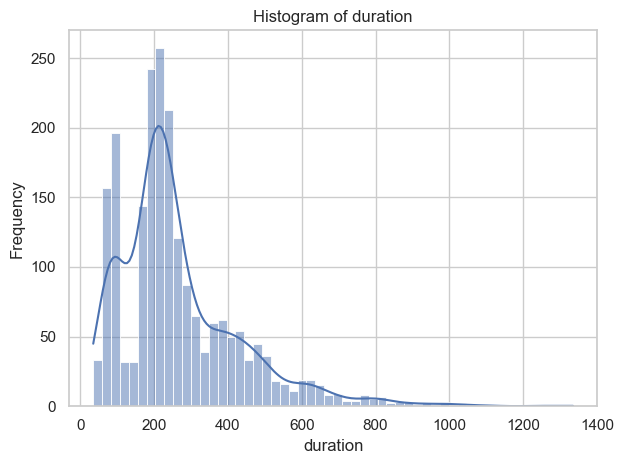

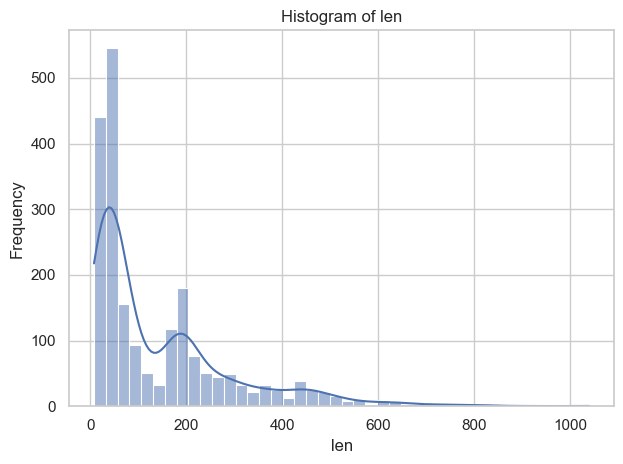

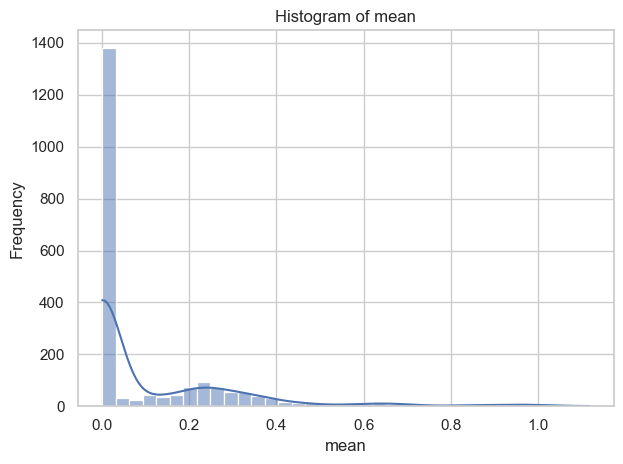

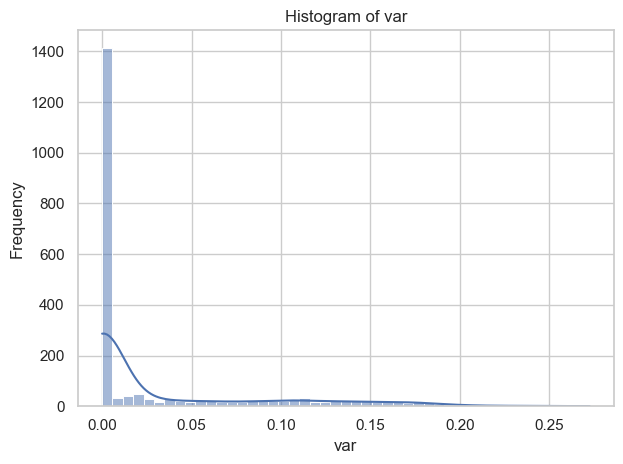

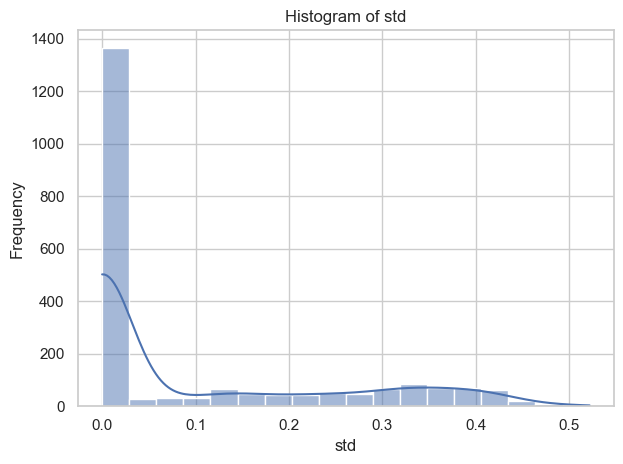

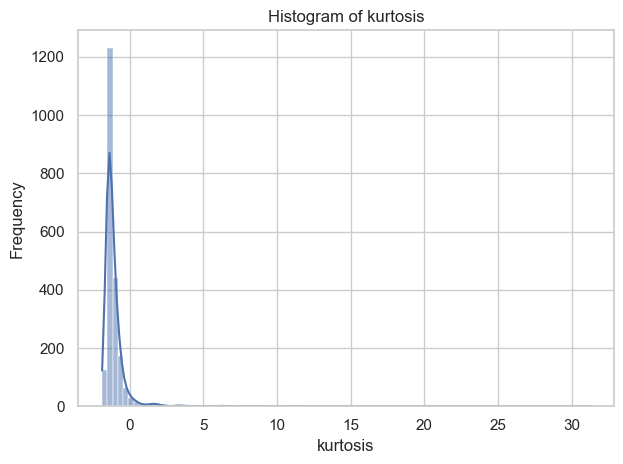

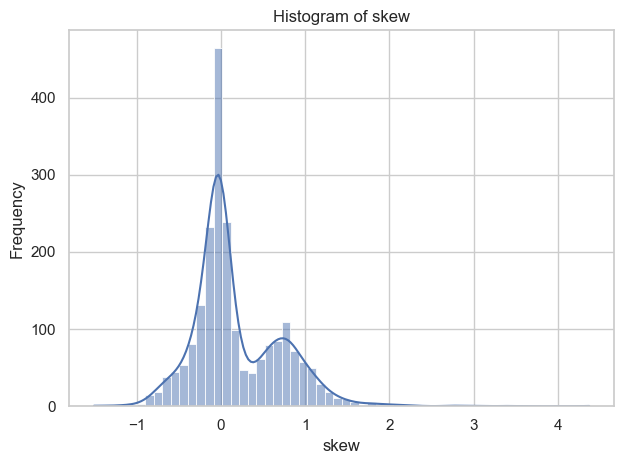

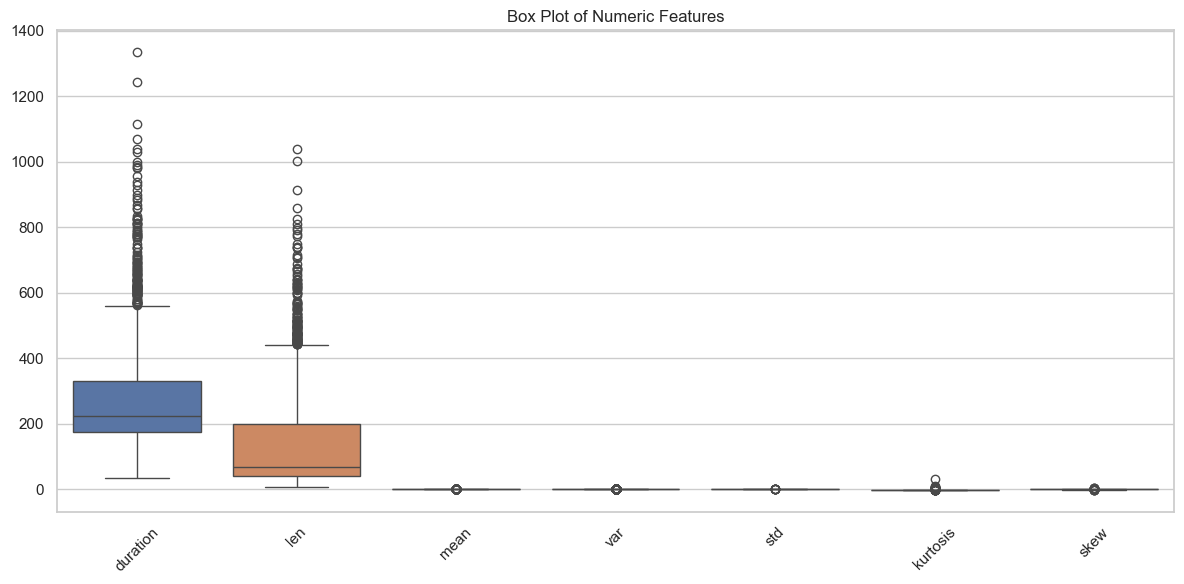

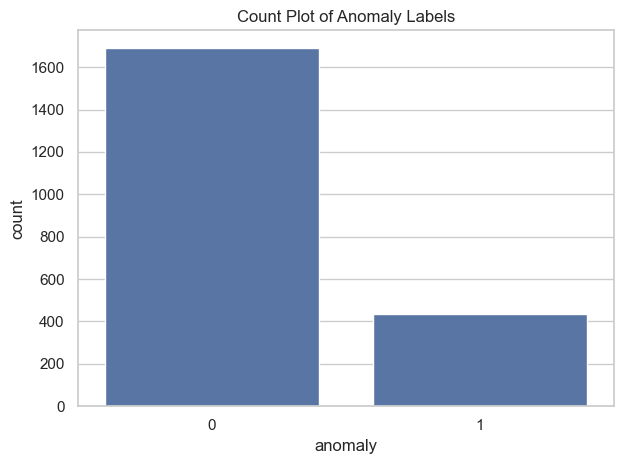

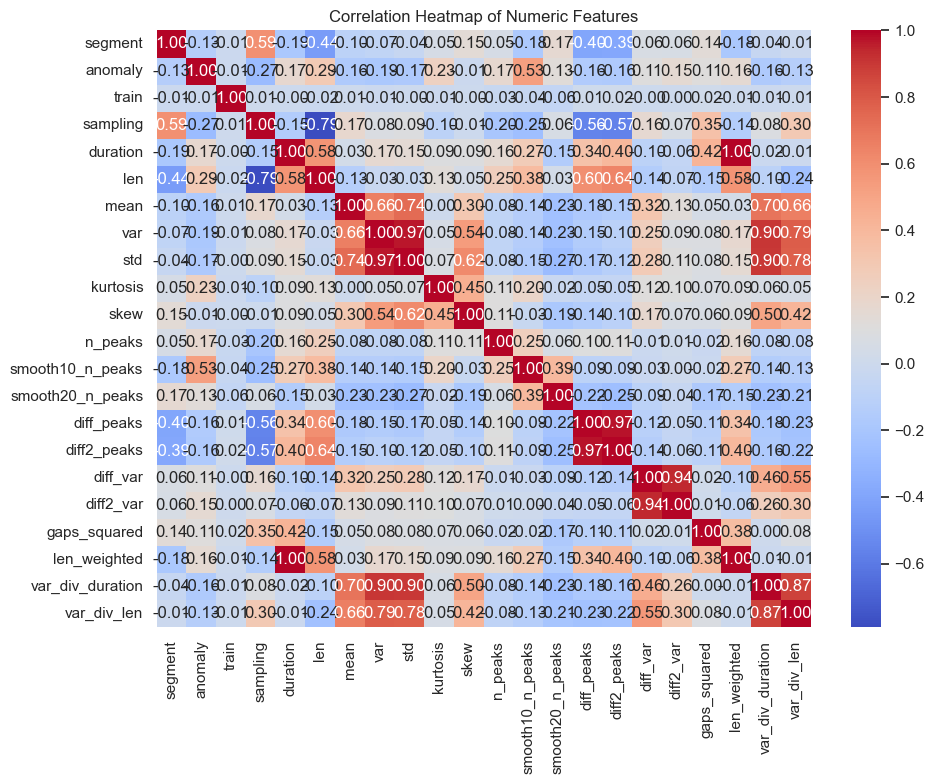

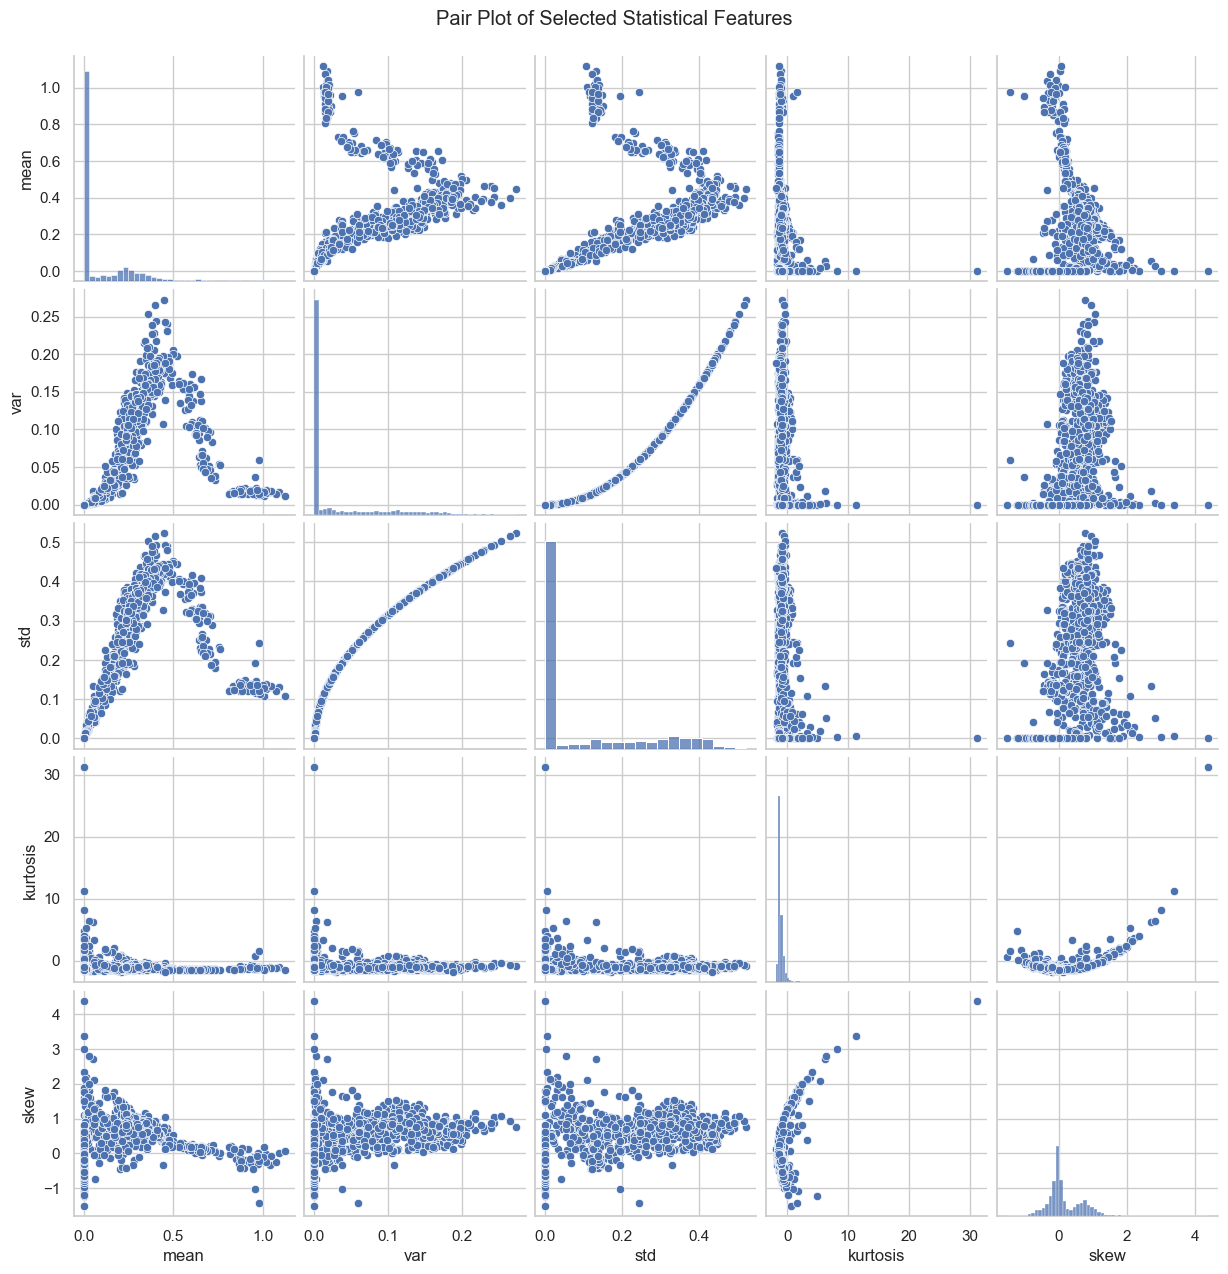

In [27]:
## Histogram of select numeric features
numeric_features = ['duration', 'len', 'mean', 'var', 'std', 'kurtosis', 'skew']
for feature in numeric_features:
    plt.figure()
    sns.histplot(df[feature], kde=True)
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

## Box Plot for numeric features to view outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[numeric_features])
plt.title('Box Plot of Numeric Features')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Count Plot for anomaly labels
plt.figure()
sns.countplot(x='anomaly', data=df)
plt.title('Count Plot of Anomaly Labels')
plt.tight_layout()
plt.show()

## Correlation Heatmap (only if 4 or more numeric columns are present)
numeric_df = df.select_dtypes(include=[np.number])
if numeric_df.shape[1] >= 4:
    plt.figure(figsize=(10, 8))
    corr = numeric_df.corr()
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Heatmap of Numeric Features')
    plt.tight_layout()
    plt.show()

## Pair Plot for visualizing relationships between select features
sample_features = ['mean', 'var', 'std', 'kurtosis', 'skew']
sns.pairplot(df[sample_features].dropna())
plt.suptitle('Pair Plot of Selected Statistical Features', y=1.02)
plt.show()


Predictive Model

Validation Accuracy: 0.9561


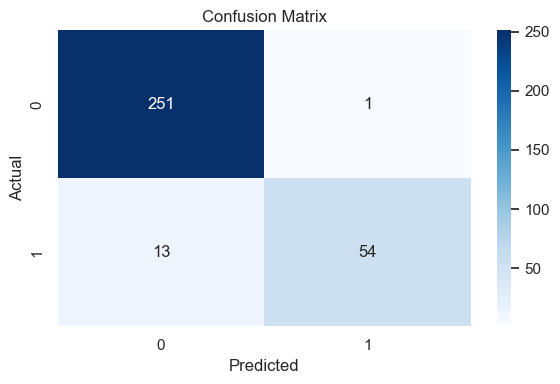

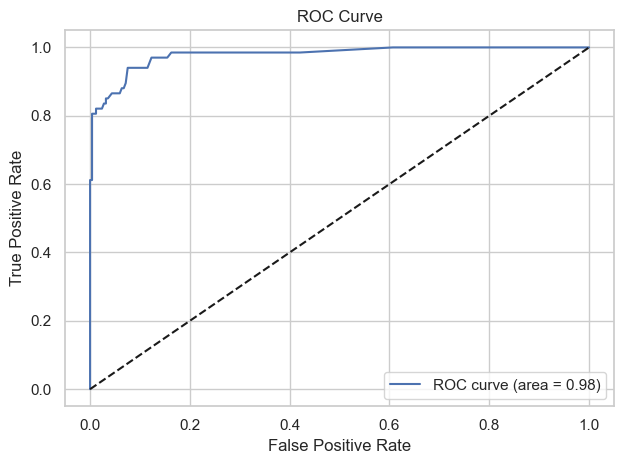

In [28]:
# Building a prediction model to detect anomalies
# We will use the aggregated features in df to predict the 'anomaly' column.
# Here, we assume that segments with train == 1 are used for training and train == 0 for testing.

# Separate the data into training and testing sets based on the 'train' column
train_df = df[df['train'] == 1].copy()
test_df = df[df['train'] == 0].copy()

# Specify features to use in the prediction. We exclude columns that are identifiers or target variables
features = [col for col in df.columns if col not in ['segment', 'anomaly', 'train', 'channel']]

# Further restrict to numeric columns to avoid complications with unencoded categorical data
train_X = train_df[features].select_dtypes(include=[np.number])
train_y = train_df['anomaly']

test_X = test_df[features].select_dtypes(include=[np.number])
test_y = test_df['anomaly']

# Split train data further into training and validation sets to evaluate performance
X_train, X_val, y_train, y_val = train_test_split(train_X, train_y, test_size=0.2, random_state=42)

# Initialize a RandomForestClassifier. This is a strong baseline for classification problems.
rfc = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model on the training data
rfc.fit(X_train, y_train)

# Predict on the validation set and compute the accuracy score
y_pred = rfc.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
print(f'Validation Accuracy: {accuracy:.4f}')

# Compute and plot the confusion matrix
cm = confusion_matrix(y_val, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

# Plot ROC Curve for a visual assessment
if len(np.unique(test_y)) == 2:  # Ensure binary classification for ROC
    y_val_prob = rfc.predict_proba(X_val)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_val, y_val_prob)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    plt.tight_layout()
    plt.show()
else:
    print('ROC Curve not applicable for multi-class classification')